In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Understanding the data

In [3]:
df = pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
x = df.iloc[:,[3,4]].values

In [31]:
x.shape

(200, 2)

In [ ]:
# perform elbow method to find optimal no. of clusters.

In [27]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init= 10)
    kmeans.fit(x)
    # Append the inertia (within-cluster sum of squares) to the list
    wcss.append(kmeans.inertia_)

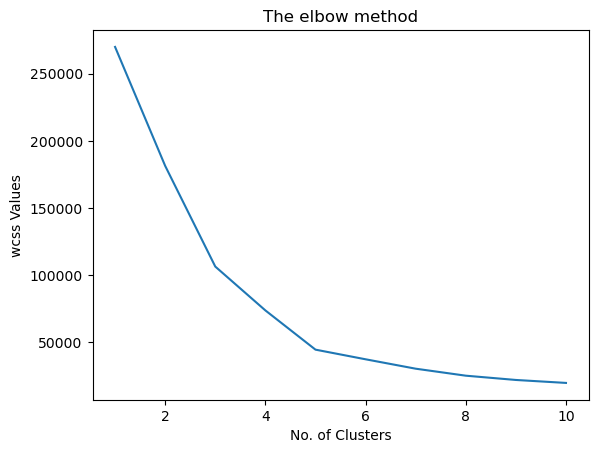

In [21]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss Values')
plt.show()

In [ ]:
# Trainig a Model using Unsupervised Learning Algorithms(k-means)

In [22]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0 , n_init = 10)

In [26]:
y_kmeans = kmeansmodel.fit_predict(x)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


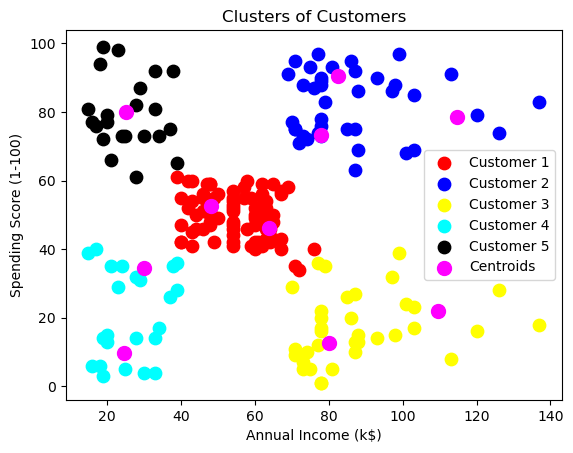

In [30]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0, 1], s=80, c = "red", label = "Customer 1")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1, 1], s=80, c = "blue", label = "Customer 2")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2, 1], s=80, c = "yellow", label = "Customer 3")
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3, 1], s=80, c = "cyan", label = "Customer 4")
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4, 1], s=80, c = "black", label = "Customer 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s= 100, c = "magenta", label = 'Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
